# Exploratory Data Analysis

In [23]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('../data/tese.csv', sep='|') 

In [5]:
# Separate numerical features
num_data = df.select_dtypes(include=['float64', 'int64'])

# Combining the account_id column and numerical features
id_column = df['account_id']
data = pd.concat([id_column, num_data], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   account_id                                  50000 non-null  object 
 1   sic_code                                    22107 non-null  float64
 2   companydataprovider_siccode                 33905 non-null  float64
 3   companydataprovider_employeenumber          34550 non-null  float64
 4   companydataprovider_revenue_in_eur          33741 non-null  float64
 5   number_distinct_active_licenses             50000 non-null  int64  
 6   initial_version                             48411 non-null  float64
 7   current_version                             50000 non-null  int64  
 8   number_rm_licenses                          50000 non-null  int64  
 9   number_rm_malwarebytes_endpoint_protection  50000 non-null  int64  
 10  number_pil

In [8]:
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18872 entries, 2 to 49998
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   account_id                                  18872 non-null  object 
 1   sic_code                                    18872 non-null  float64
 2   companydataprovider_siccode                 18872 non-null  float64
 3   companydataprovider_employeenumber          18872 non-null  float64
 4   companydataprovider_revenue_in_eur          18872 non-null  float64
 5   number_distinct_active_licenses             18872 non-null  int64  
 6   initial_version                             18872 non-null  float64
 7   current_version                             18872 non-null  int64  
 8   number_rm_licenses                          18872 non-null  int64  
 9   number_rm_malwarebytes_endpoint_protection  18872 non-null  int64  
 10  number_pil

In [12]:
numerical_features = ['account_id', 'companydataprovider_employeenumber', 'companydataprovider_revenue_in_eur', 'number_distinct_active_licenses',
       'total_connections_12m', 'total_endpoints_12m', 'total_devices_12m', 'days_from_last_invoice', 'age_customer', 'number_renewals', 
       'number_total_invoices', 'account_value_in_eur', 'revenue_last_12_month', 'years_purchased', 'billings_ltm_prorated']

In [14]:
data = data[numerical_features].copy()

In [15]:
filtered_df = data[(data['total_connections_12m'] > 0) & (data['total_endpoints_12m'] > 0) & (data['total_devices_12m'] > 0)]

In [18]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17504 entries, 2 to 49998
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   account_id                          17504 non-null  object 
 1   companydataprovider_employeenumber  17504 non-null  float64
 2   companydataprovider_revenue_in_eur  17504 non-null  float64
 3   number_distinct_active_licenses     17504 non-null  int64  
 4   total_connections_12m               17504 non-null  int64  
 5   total_endpoints_12m                 17504 non-null  int64  
 6   total_devices_12m                   17504 non-null  int64  
 7   days_from_last_invoice              17504 non-null  int64  
 8   age_customer                        17504 non-null  int64  
 9   number_renewals                     17504 non-null  int64  
 10  number_total_invoices               17504 non-null  int64  
 11  account_value_in_eur                17504

In [19]:
filtered_df

account_id  \
2      8451D3C3-FC1A-E411-80D3-005056846F2F   
3      B6B0B074-213F-ED11-9DB0-000D3ADEAD35   
4      3151AAFA-F21A-E411-80D3-005056846F2F   
5      7CA97D7A-A1F0-EC11-BB3D-000D3AB57339   
8      583B0A8A-C417-EC11-B6E6-000D3ADC1859   
...                                     ...   
49969  9DC5CDED-C898-ED11-AAD1-000D3ADEA83D   
49973  D0B6E4F9-E81A-E411-80D3-005056846F2F   
49981  8CD2F113-BF75-EB11-A812-000D3AB25E8C   
49994  95C51C1D-A4D6-E711-80EF-005056844077   
49998  952309B8-21A5-E811-8108-005056844077   

       companydataprovider_employeenumber  companydataprovider_revenue_in_eur  \
2                                    52.0                          15379307.0   
3                                     3.0                             82742.0   
4                                   242.0                          15454197.0   
5                                     7.0                            830000.0   
8                                   385.0                           4320000.0   
...                                   ...                                 ...   
49969                                 9.0                           3111000.0   
49973                               105.0                          18900000.0   
49981                                 7.0                            930779.0   
49994                                 5.0                            954000.0   
49998                                 1.0                             26294.0   

       number_distinct_active_licenses  total_connections_12m  \
2                                    3                   3349   
3                                    1                     78   
4                                    1                    243   
5                                    1                    944   
8                                    1                     76   
...                                ...                    ...   
49969                                1                    297   
49973                                3                   3512   
49981                                1                    561   
49994                                2                    775   
49998                                1                    668   

       total_endpoints_12m  total_devices_12m  days_from_last_invoice  \
2                      611                 21                      85   
3                        4                  2                      57   
4                       33                  3                     149   
5                        5                  7                     157   
8                        1                  3                      62   
...                    ...                ...                     ...   
49969                    7                 16                     161   
49973                 1578                168                     185   
49981                    9                  2                     272   
49994                   89                 22                     293   
49998                  273                  4                      95   

       age_customer  number_renewals  number_total_invoices  \
2                13                2                      6   
3                 1                1                      2   
4                12                5                      7   
5                 1                1                      2   
8                 2                2                      3   
...             ...              ...                    ...   
49969             0                0                      2   
49973            13                7                     12   
49981             2                2                      3   
49994            10                4                     15   
49998             5                5                      6   

       account_value_in_eur  revenue_last_12_month  years_purchased  \
2        

In [20]:
filtered_df.describe()

companydataprovider_employeenumber  companydataprovider_revenue_in_eur  \
count                        17504.000000                        1.750400e+04   
mean                           201.150023                        6.173869e+07   
std                           3700.381289                        1.109982e+09   
min                              0.000000                        0.000000e+00   
25%                              4.000000                        2.950000e+05   
50%                             11.000000                        1.375010e+06   
75%                             45.000000                        7.304972e+06   
max                         383000.000000                        8.684900e+10   

       number_distinct_active_licenses  total_connections_12m  \
count                     17504.000000           17504.000000   
mean                          1.713037            1818.809015   
std                           1.443277            7229.108441   
min                           1.000000               1.000000   
25%                           1.000000             108.000000   
50%                           1.000000             407.000000   
75%                           2.000000            1396.250000   
max                         125.000000          395284.000000   

       total_endpoints_12m  total_devices_12m  days_from_last_invoice  \
count         17504.000000       17504.000000            17504.000000   
mean            198.084095          21.455382              162.298789   
std            1371.538451         108.767338               94.814162   
min               1.000000           1.000000                1.000000   
25%               7.000000           2.000000               79.000000   
50%              33.000000           5.000000              164.000000   
75%             143.000000          15.000000              247.000000   
max          156015.000000        8748.000000              327.000000   

       age_customer  number_renewals  number_total_invoices  \
count  17504.000000     17504.000000           17504.000000   
mean       5.449154         3.833924               6.967893   
std        3.938906         5.172222               6.907382   
min        0.000000         0.000000               1.000000   
25%        2.000000         2.000000               4.000000   
50%        4.000000         4.000000               6.000000   
75%        8.000000         5.000000               9.000000   
max       17.000000       127.000000             150.000000   

       account_value_in_eur  revenue_last_12_month  years_purchased  \
count          17504.000000           17504.000000     17504.000000   
mean            6215.055788            1457.704246     13375.593921   
std            14848.424177            5551.162652     13131.108190   
min               76.720000               0.000000      2023.000000   
25%             1446.770000             391.520000      8068.750000   
50%             2814.610000             576.140000     10106.000000   
75%             7113.865000            1399.000000     16156.000000   
max           715235.440000          288118.540000    260337.000000   

       billings_ltm_prorated  
count           17504.000000  
mean             1468.900094  
std              5311.161663  
min                10.310000  
25%               394.800000  
50%               633.975000  
75%              1475.605000  
max            457708.280000

In [25]:
fig = px.scatter_matrix(filtered_df.drop("account_id",axis=1),
                        width=1200,
                        height=1600)
fig.show()

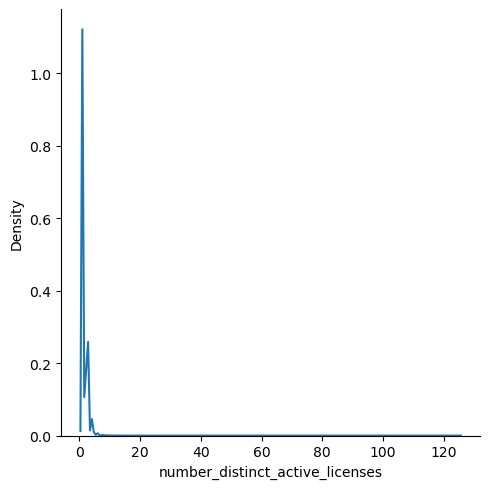

In [32]:
sns.displot(filtered_df, x="number_distinct_active_licenses", kind="kde")

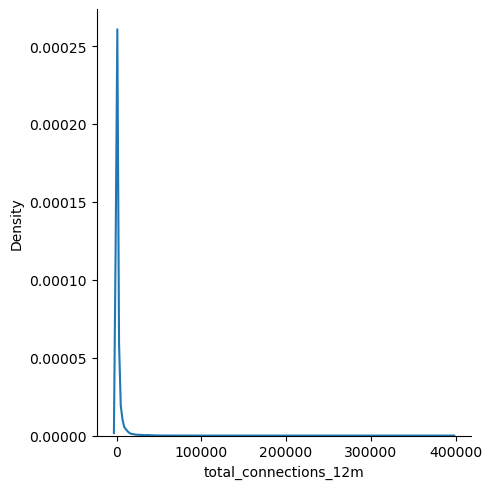

In [26]:
sns.displot(filtered_df, x="total_connections_12m", kind="kde")

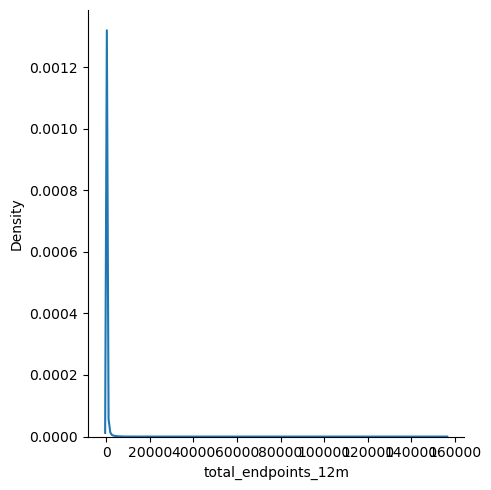

In [27]:
sns.displot(filtered_df, x="total_endpoints_12m", kind="kde")

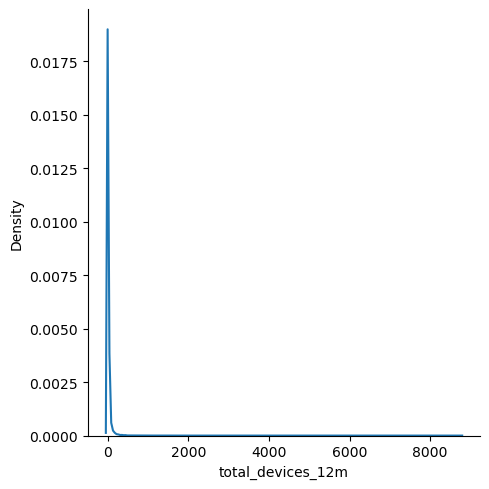

In [28]:
sns.displot(filtered_df, x="total_devices_12m", kind="kde")

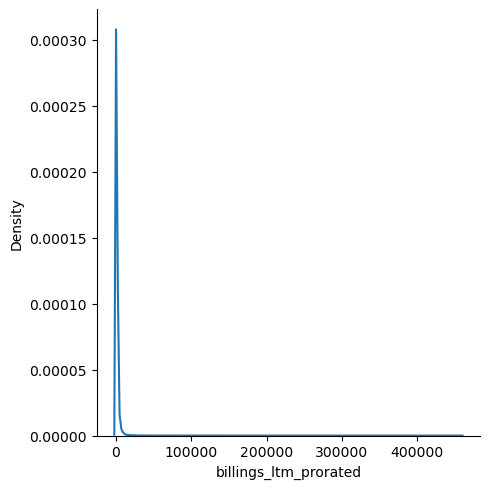

In [29]:
sns.displot(filtered_df, x="billings_ltm_prorated", kind="kde")

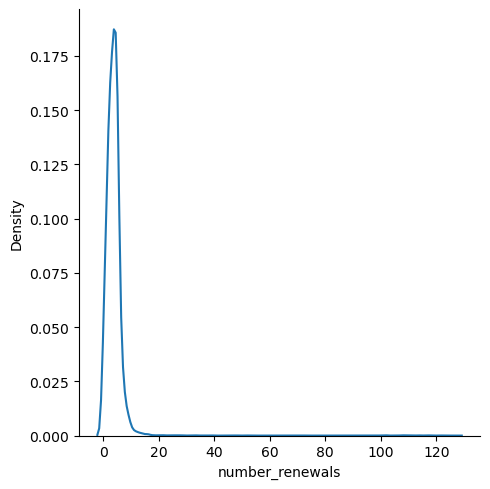

In [33]:
sns.displot(filtered_df, x="number_renewals", kind="kde")